In [5]:
import os 
import tarfile
import urllib

Download_Root="https://raw.githubusercontent.com/ageron/handson-ml2/master/"
Housing_path=os.path.join("datasets","housing")
Housing_URL = Download_Root + "datasets/housing/housing.tgz"



In [6]:
def fetch_housing_data(housingUrl=Housing_URL,housing_path=Housing_path):
    os.makedirs(housing_path,exist_ok=True)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    urllib.request.urlretrieve(housingUrl,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    print("housing datasets downloaded at ",housing_path)
fetch_housing_data()

housing datasets downloaded at  datasets\housing


In [7]:
import pandas as pd 
def load_housing_data(housing_path=Housing_path):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [8]:
housing =load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


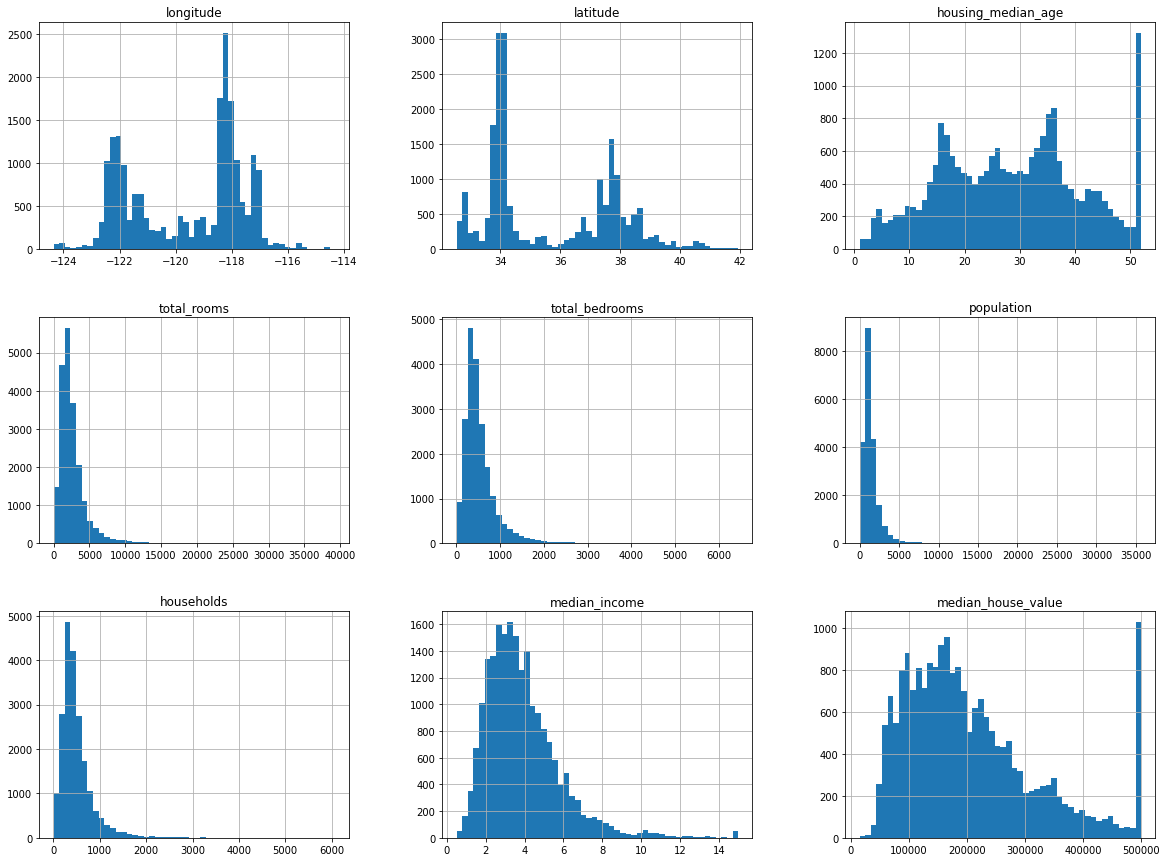

In [10]:
%matplotlib inline 
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

<AxesSubplot:>

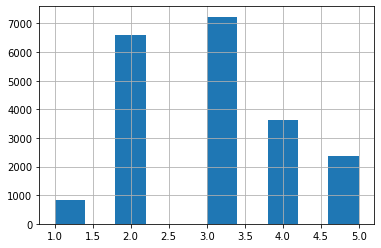

In [11]:
import numpy as np
housing['income_cat']=pd.cut(housing['median_income'],bins=[0.,1.5,3.0,4.5,6,np.inf],labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
#     print("train_index",train_index," test_index",test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
# strat_test_set['income_cat'].value_counts()/len(strat_test_set)
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [13]:
housing=strat_train_set.copy()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

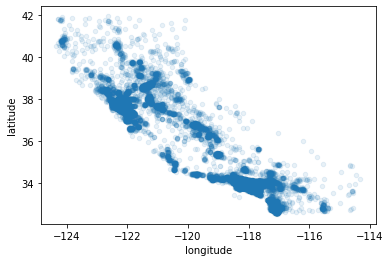

In [14]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

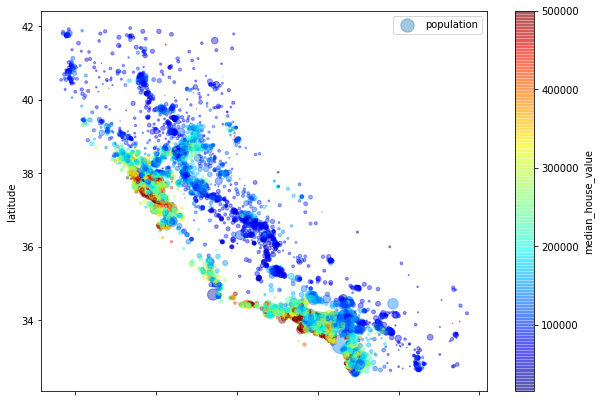

In [15]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing['population']/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

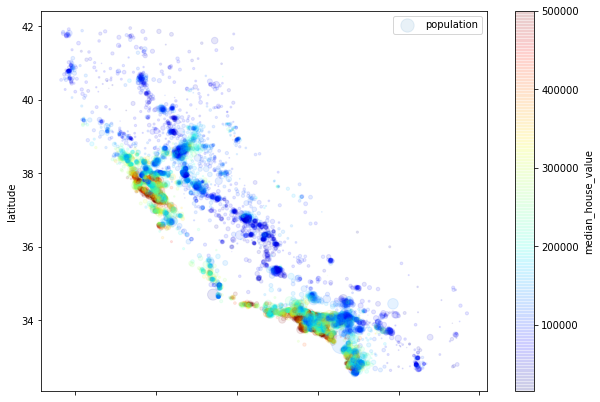

In [16]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,s=housing['population']/100,label="population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.show()

In [17]:
corr_matrix=housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

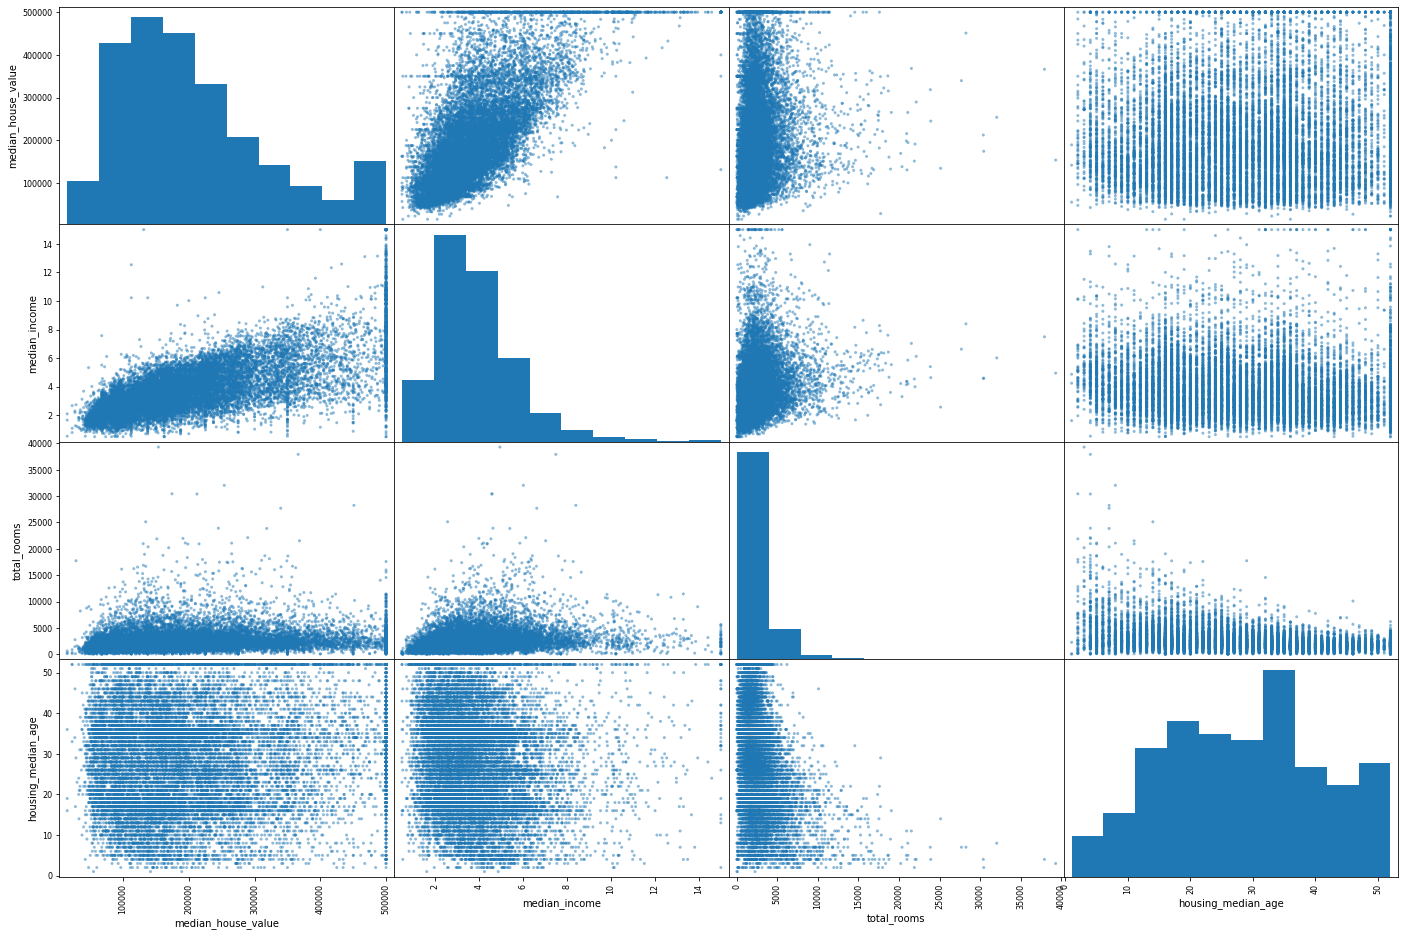

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(24,16))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

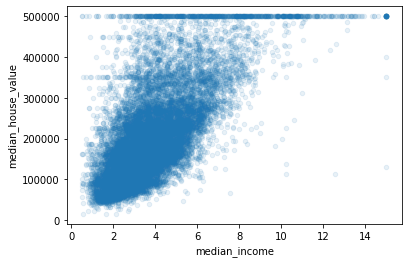

In [19]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
# we can see some horizontal lines , the one at the top is intential due to caping of data,
# but other could be removed so that our model wont learn these trends in the ML 

In [20]:
housing["rooms_per_households"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_rooms"]=housing["total_bedrooms"]/housing["total_rooms"]
housing['population_per_households']=housing["population"]/housing["households"]

In [21]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.687160
rooms_per_households         0.146285
total_rooms                  0.135097
housing_median_age           0.114110
households                   0.064506
total_bedrooms               0.047689
population_per_households   -0.021985
population                  -0.026920
longitude                   -0.047432
latitude                    -0.142724
bedrooms_per_rooms          -0.259984
Name: median_house_value, dtype: float64

In [22]:
housing = strat_train_set.drop("median_house_value",axis=1)
housing_label = strat_train_set["median_house_value"].copy()

In [23]:
# transforming the data to have no null values init 
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
housing_num= housing.drop("ocean_proximity",axis=1)
imputer.fit(housing_num)
print(imputer.statistics_)
X=imputer.transform(housing_num)
housing_tr=pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)

[-118.51     34.26     29.     2119.5     433.     1164.      408.
    3.5409]


In [24]:
housing_cat=housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [25]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)
print(ordinal_encoder.categories_)
housing_cat_encoded[:10]

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)]


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [26]:
from sklearn.preprocessing import OneHotEncoder 
encoder_1Hot =OneHotEncoder()
housing_1hot_encoded=encoder_1Hot.fit_transform(housing_cat)
housing_1hot_encoded

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [27]:
housing_1hot_encoded.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [28]:
# creating custom Transformer
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    def __init__(self,add_bedrooms_per_rooms=False):
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self,X,y=None):
        return self;
    def transform(self,X,y=None):
        roomsPerHouseholds=X[:,rooms_ix]/X[:,households_ix]
        populationPerHouseholds=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_rooms:
            bedroomsPerRooms=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,roomsPerHouseholds,populationPerHouseholds,bedroomsPerRooms]
        return np.c_[X,roomsPerHouseholds,populationPerHouseholds]


attr_adder = CombinedAttributesAdder(add_bedrooms_per_rooms=False)
housing_extra_attribs =attr_adder.transform(housing.values)


In [29]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler())
])
housing_num_tr= num_pipeline.fit_transform(housing_num)

In [30]:
from sklearn.compose import ColumnTransformer
# takes list of tuples with name, transformer/pipeline, columns to transform
num_attribs=list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline= ColumnTransformer([('num',num_pipeline,num_attribs),('cat',OneHotEncoder(),cat_attribs)])

housing_prepared=full_pipeline.fit_transform(housing)

In [31]:
# Traning the model
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_label)

LinearRegression()

In [32]:
# Predictions 
some_data = housing.iloc[:5]
some_labels = housing_label.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Pridections: ",lin_reg.predict(some_data_prepared))
print("Labels: ",list(some_labels))

Pridections:  [211888.26540421 321274.25149998 210853.46010112  62261.10820843
 194921.76527689]
Labels:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [33]:
# Measuring Accuracy
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label,housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68911.76054233838

In [34]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_label)

DecisionTreeRegressor()

In [35]:
housing_predictions=tree_reg.predict(housing_prepared)
tree_mse=mean_squared_error(housing_label,housing_predictions)
tree_rmse=np.sqrt(tree_mse)
tree_rmse

0.0

In [36]:
# cross Validation it fits the estimator with any 9 folds and estimates it with the remaining 10th one for 10 timese because cv is 10 and returns 
# 10 mean square error of each validation in an array
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores =np.sqrt(-scores)
def display_score(scores):
    print("scores",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())
display_score(tree_rmse_scores)

scores [69935.42855889 68955.87809091 68723.26998264 71400.13559744
 71906.38179174 74755.22750316 72791.74819313 68974.47475653
 77053.01382394 69098.65148634]
Mean: 71359.42097847143
Standard deviation: 2680.5596165487887


In [37]:
lin_scores = cross_val_score(lin_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores =np.sqrt(-lin_scores)
display_score(lin_rmse_scores)

scores [67461.9308165  67232.2484863  68224.22888082 74716.58955656
 68420.26897488 71610.91469695 65201.58349349 68686.9304607
 72262.5140762  68112.28697795]
Mean: 69192.94964203317
Standard deviation: 2674.1447265970132


In [41]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_label)
housing_predictions=forest_reg.predict(housing_prepared)
forest_mse=mean_squared_error(housing_label,housing_predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse # rmse in training set 


18735.390573885594

In [42]:
forest_scores = cross_val_score(forest_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores =np.sqrt(-forest_scores)
display_score(forest_rmse_scores) # rmse in validation set 

scores [49473.28220668 47652.29081017 49380.5167836  52465.65005735
 49290.59148343 53876.38478559 49353.77727445 47966.88669235
 53496.92623387 50281.03171771]
Mean: 50323.7338045208
Standard deviation: 2087.8833508161406


In [47]:
# Fine Tuning the model 
#  Grid Search to find the best parameters from a list of parameters 
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True)
grid_search.fit(housing_prepared,housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
# Getting the best_params
print(grid_search.best_params_)
# Getting the estimator for the GridSearchCV 
print(grid_search.best_estimator_)

{'max_features': 6, 'n_estimators': 30}
RandomForestRegressor(max_features=6, n_estimators=30)


In [53]:
# Getting the evaluation scores 
cvres= grid_search.cv_results_
for mean_scores, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_scores),params)

63178.5740163303 {'max_features': 2, 'n_estimators': 3}
54662.65051792801 {'max_features': 2, 'n_estimators': 10}
52486.81465222756 {'max_features': 2, 'n_estimators': 30}
60534.264551072476 {'max_features': 4, 'n_estimators': 3}
52101.858703350415 {'max_features': 4, 'n_estimators': 10}
50084.14004284379 {'max_features': 4, 'n_estimators': 30}
59078.55580557383 {'max_features': 6, 'n_estimators': 3}
51312.225796824896 {'max_features': 6, 'n_estimators': 10}
49705.44151550382 {'max_features': 6, 'n_estimators': 30}
58205.52937714555 {'max_features': 8, 'n_estimators': 3}
51981.29900778217 {'max_features': 8, 'n_estimators': 10}
49807.04081563821 {'max_features': 8, 'n_estimators': 30}
62039.65691289845 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53821.081393487795 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60352.50606145067 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52146.709940832756 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [55]:
# Should use RandomizedSearchCV instead of GridSearchCV because its faster by randomizing the parameters from the list and not running 
# all the parameters to find the best estimator form the given parameters 

In [60]:
# Finding the importance of each feature in the estimator
feature_importance = grid_search.best_estimator_.feature_importances_
extra_attribs = ['rooms_per_hholds','pop_per_hholds','bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.34595488127217416, 'median_income'),
 (0.1391672369246311, '<1H OCEAN'),
 (0.10699998181657348, 'pop_per_hholds'),
 (0.09706371888661419, 'rooms_per_hholds'),
 (0.0858868185617352, 'longitude'),
 (0.08415929732251186, 'latitude'),
 (0.044255324775739305, 'housing_median_age'),
 (0.018767040728651416, 'total_rooms'),
 (0.018494395130320317, 'population'),
 (0.018127343372764407, 'total_bedrooms'),
 (0.017163101033530456, 'households'),
 (0.014126021187964332, 'bedrooms_per_room'),
 (0.006524270393397161, 'NEAR BAY'),
 (0.003267371581332148, 'ISLAND'),
 (4.319701206043559e-05, 'INLAND')]

In [62]:
# Evaluating the Model 
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value",axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test,final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

47070.9058250613


In [66]:
# 95% confidence interval for generalization error 
from scipy import stats 
confidence = 0.95
squared_error = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence,len(squared_error)-1,loc=squared_error.mean(),scale=stats.sem(squared_error)))

array([45076.11568413, 48984.52965187])